# Vitoria Sampaio Alves

In [428]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




## Configuração para exibir os Dataframes completos

In [429]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Leitura do banco de dados usando Pandas

In [430]:
cat_school_data = pd.read_csv('cat_school_data.csv', delimiter=';')
num_school_data = pd.read_csv('num_school_data.csv', delimiter=';')
cat_student_data = pd.read_csv('cat_student_data.csv', delimiter=';')
num_student_data = pd.read_csv('num_student_data.csv', delimiter=';')

# Tratamento de dados

## DataFrame do Cat School

In [431]:
#Remoção das linhas duplicadas para garantir dados únicos no cat_school_data
df_catschool_no_duplicates = cat_school_data.drop_duplicates()


In [432]:
#Transformando a variável em coluna
df_catschool = df_catschool_no_duplicates.pivot(index='school', columns='variable', values='value')


## DataFrame do Cat Students

In [433]:
#Remoção das linhas duplicadas
df_catstudent_no_duplicates = cat_student_data.drop_duplicates()



In [434]:
#Pivoteia e agrega os dados em uma tabela dinâmica
df_catstudent_pivot_table = df_catstudent_no_duplicates.pivot_table(
    
    index=['school', 'student'], 
    columns='variable',
    values='value',
    #em caso de valores duplicados para a mesma combinação de índices, mantém o primeiro
    aggfunc='first'
)



In [435]:
#Preenchimento de valores ausentes substituindo-os por 'NA'
df_catstudent = df_catstudent_pivot_table.fillna('NA')



## DataFrame do Num Student

In [436]:
#Cria um novo DataFrame chamado num_student_data_unique para remover as linhas duplicadas a partir de num_student_data
num_student_data_unique = num_student_data.drop_duplicates(
    
    #Verificando as duplicatas e mantendo a primeira ocorrência de cada combinação única
    subset=['school', 'student', 'variable'], keep='first'
) 


In [437]:
#Cria um novo DataFrame chamado df_numstudent a partir de num_student_data_unique
df_numstudent = num_student_data_unique.pivot(
    index=['school', 'student'], columns='variable', values='value'
).reset_index()  

In [438]:
# Substituição das vírgulas por pontos na coluna 'normexam'
df_numstudent['normexam'] = df_numstudent['normexam'].astype(str).str.replace(',', '.', regex=False)

#Converter a coluna 'normexam' para tipo numérico para podermos analisar no gráfico
df_numstudent['normexam'] = pd.to_numeric(df_numstudent['normexam'], errors='coerce')

In [439]:
#Substituição das vírgulas por pontos na coluna 'standLRT'
df_numstudent['standLRT'] = df_numstudent['standLRT'].str.replace(',', '.', regex=False)

#Converter a coluna 'standLRT' para tipo numérico
df_numstudent['standLRT'] = pd.to_numeric(df_numstudent['standLRT'], errors='coerce')



In [440]:
df_numstudent.head(10)

variable,school,student,normexam,standLRT
0,1,NaN,1.506185,0.536408
1,1,1.0,1.506185,0.784362
2,1,4.0,-0.555112,-1.033970
3,1,6.0,-1.335315,-0.951318
4,1,7.0,-0.555112,-2.356393
5,1,13.0,-0.197611,-0.290107
6,1,14.0,-0.197611,0.040499
7,1,16.0,2.313601,0.784362
8,1,17.0,-0.062088,-0.703364
9,1,19.0,-0.939378,-0.372758


In [441]:
#Percebe-se que o NaN aparece em nossa coluna Student, iremos removê-lo utilizando a função dropna()
df_numstudent.dropna(subset=['student'], inplace=True)

In [442]:
df_numstudent.head()

variable,school,student,normexam,standLRT
1,1,1.0,1.506185,0.784362
2,1,4.0,-0.555112,-1.033970
3,1,6.0,-1.335315,-0.951318
4,1,7.0,-0.555112,-2.356393
5,1,13.0,-0.197611,-0.290107


## DataFrame do Num School

In [443]:
#Verificando se há valores duplicados
duplicate_rows = num_school_data[num_school_data.duplicated()]
duplicate_rows


,school,variable,value


In [444]:
num_school_data.head()

,school,variable,value
0,1,schavg,"0,1661752"
1,2,schavg,"0,3951492"
2,3,schavg,"0,5141552"
3,4,schavg,"0,0917642"
4,5,schavg,"0,2105252"


In [445]:
#Renomear a coluna 'variable' para 'schvag'
num_school_data = num_school_data.rename(columns={'variable': 'schvag'})

#Converter a coluna 'value' para numérico, substituindo vírgulas por pontos
num_school_data['schavg'] = pd.to_numeric(num_school_data['value'].astype(str).str.replace(',', '.', regex=False), errors='coerce')



In [446]:
num_school_data.head()

,school,schvag,value,schavg
0,1,schavg,"0,1661752",0.166175
1,2,schavg,"0,3951492",0.395149
2,3,schavg,"0,5141552",0.514155
3,4,schavg,"0,0917642",0.091764
4,5,schavg,"0,2105252",0.210525


In [447]:
#Redefinir o índice para incluir a coluna 'school'
df_numschool = dfnumschool.reset_index()

#Selecionar apenas as colunas 'school' e 'schavg'
df_numschool = dfnumschool[['school', 'schavg']]



In [448]:
df_numschool.head()

,school,schavg
0,1,0.166175
1,2,0.395149
2,3,0.514155
3,4,0.091764
4,5,0.210525


## Dataframes School e Student

In [449]:
df_school.head()

,school,schavg,schgend,type
0,1,0.166175,mixed,Mxd
1,2,0.395149,girls,Sngl
2,3,0.514155,mixed,Mxd
3,4,0.091764,mixed,Mxd
4,5,0.210525,mixed,Mxd


In [450]:
df_student.head()

variable,school,student,normexam,standLRT,intake,sex,vr
0,1,1.0,1.506185,0.784362,bottom 25%,F,mid 50%
1,1,4.0,-0.555112,-1.033970,mid 50%,F,mid 50%
2,1,6.0,-1.335315,-0.951318,mid 50%,M,mid 50%
3,1,7.0,-0.555112,-2.356393,top 25%,M,mid 50%
4,1,13.0,-0.197611,-0.290107,mid 50%,M,mid 50%


## Juntando os DataFrames

In [451]:
df_school = pd.merge(df_numschool, df_catschool, on="school", how="left")
df_student = pd.merge(df_numstudent, df_catstudent, on=["school", "student"], how="left")
df_complete = pd.merge(df_student, df_school, on="school", how="left")


In [452]:
df_complete.head(15)

,school,student,normexam,standLRT,intake,sex,vr,schavg,schgend,type
0,1,1.0,1.506185,0.784362,bottom 25%,F,mid 50%,0.166175,mixed,Mxd
1,1,4.0,-0.555112,-1.033970,mid 50%,F,mid 50%,0.166175,mixed,Mxd
2,1,6.0,-1.335315,-0.951318,mid 50%,M,mid 50%,0.166175,mixed,Mxd
3,1,7.0,-0.555112,-2.356393,top 25%,M,mid 50%,0.166175,mixed,Mxd
4,1,13.0,-0.197611,-0.290107,mid 50%,M,mid 50%,0.166175,mixed,Mxd
5,1,14.0,-0.197611,0.040499,mid 50%,M,mid 50%,0.166175,mixed,Mxd
6,1,16.0,2.313601,0.784362,bottom 25%,F,mid 50%,0.166175,mixed,Mxd
7,1,17.0,-0.062088,-0.703364,mid 50%,F,mid 50%,0.166175,mixed,Mxd
8,1,19.0,-0.939378,-0.372758,mid 50%,NA,mid 50%,0.166175,mixed,Mxd
9,1,22.0,0.478194,-0.290107,mid 50%,M,mid 50%,0.166175,mixed,Mxd


In [453]:
#Necessita-se saber se há valores nulos (NULL) em nossa tabela

dataframes = {
    'cat_school_data': cat_school_data,
    'num_school_data': num_school_data,
    'cat_student_data': cat_student_data,
    'num_student_data': num_student_data
}

for table_name, df in dataframes.items():
    
    #Checando se há valores nulos
    null_cols = df.columns[df.isnull().any()].tolist()

    #Condição para saber quais tabelas possuem nulidade
    if null_cols:
        print(f"A tabela '{table_name}' possui valores nulos nas colunas: {', '.join(null_cols)}")
    else:
        print(f"A tabela '{table_name}' não possui valores nulos.")


A tabela 'cat_school_data' não possui valores nulos.
A tabela 'num_school_data' não possui valores nulos.
A tabela 'cat_student_data' não possui valores nulos.
A tabela 'num_student_data' possui valores nulos nas colunas: student, value


Observação: Encontramos valores nulos na coluna 'student' e 'value'. Todavia se removermos esses valores de 'student' iria resultar na perda de informações.

In [454]:
df_student.head(9)

variable,school,student,normexam,standLRT,intake,sex,vr
0,1,1.0,1.506185,0.784362,bottom 25%,F,mid 50%
1,1,4.0,-0.555112,-1.033970,mid 50%,F,mid 50%
2,1,6.0,-1.335315,-0.951318,mid 50%,M,mid 50%
3,1,7.0,-0.555112,-2.356393,top 25%,M,mid 50%
4,1,13.0,-0.197611,-0.290107,mid 50%,M,mid 50%
5,1,14.0,-0.197611,0.040499,mid 50%,M,mid 50%
6,1,16.0,2.313601,0.784362,bottom 25%,F,mid 50%
7,1,17.0,-0.062088,-0.703364,mid 50%,F,mid 50%
8,1,19.0,-0.939378,-0.372758,mid 50%,NA,mid 50%


In [455]:
#Nota-se que temos valores 'NA' na coluna de 'sex' porém não podemos tirá-la por possíveis prejuízos na análise
#A melhor opção no momento é fazer substituição de 'NA' por 'Unknown'

df_complete['sex'] = df_complete['sex'].replace('NA', 'Unknown')

df_complete.head(9)


,school,student,normexam,standLRT,intake,sex,vr,schavg,schgend,type
0,1,1.0,1.506185,0.784362,bottom 25%,F,mid 50%,0.166175,mixed,Mxd
1,1,4.0,-0.555112,-1.033970,mid 50%,F,mid 50%,0.166175,mixed,Mxd
2,1,6.0,-1.335315,-0.951318,mid 50%,M,mid 50%,0.166175,mixed,Mxd
3,1,7.0,-0.555112,-2.356393,top 25%,M,mid 50%,0.166175,mixed,Mxd
4,1,13.0,-0.197611,-0.290107,mid 50%,M,mid 50%,0.166175,mixed,Mxd
5,1,14.0,-0.197611,0.040499,mid 50%,M,mid 50%,0.166175,mixed,Mxd
6,1,16.0,2.313601,0.784362,bottom 25%,F,mid 50%,0.166175,mixed,Mxd
7,1,17.0,-0.062088,-0.703364,mid 50%,F,mid 50%,0.166175,mixed,Mxd
8,1,19.0,-0.939378,-0.372758,mid 50%,Unknown,mid 50%,0.166175,mixed,Mxd


In [458]:
describe_numerics = df_complete.describe(include=[np.number]).round(2)
print("Resumo Estatístico das Colunas Numéricas:")
describe_numerics



Resumo Estatístico das Colunas Numéricas:


,school,student,normexam,standLRT,schavg
count,4010.00,4010.00,3939.00,3981.00,4010.00
mean,30.92,134.30,0.00,0.01,0.00
std,18.93,174.55,1.00,0.99,0.32
min,1.00,1.00,-3.67,-2.93,-0.76
25%,14.00,39.00,-0.70,-0.62,-0.15
50%,29.00,78.00,0.00,0.04,-0.02
75%,47.00,138.00,0.68,0.62,0.27
max,65.00,913.00,3.67,3.02,0.64


In [459]:
describe_non_numerics = df_complete.describe(include=[object])
print("\nResumo Estatístico das Colunas Não Numéricas:")
describe_non_numerics


Resumo Estatístico das Colunas Não Numéricas:


,intake,sex,vr,schgend,type
count,4010,4010,4010,4010,4010
unique,4,3,4,3,2
top,mid 50%,F,mid 50%,mixed,Mxd
freq,2293,2351,2205,2139,2139


# Análise exploratória de dados

### Existe uma diferença significativa no desempenho médio em exames normalizados entre escolas de diferentes genêros?

In [413]:
summary_stats = df_complete.groupby('schgend')['normexam'].describe().round(2)
summary_stats

,count,mean,std,min,25%,50%,75%,max
schgend,,,,,,,,
boys,503.0,0.02,1.05,-2.75,-0.70,0.07,0.75,2.53
girls,1339.0,0.15,0.98,-3.06,-0.49,0.13,0.75,3.67
mixed,2097.0,-0.10,0.98,-3.67,-0.78,-0.13,0.54,2.92


Nota-se que de acordo com a média (mean) os colégios unicamente femininos apresentam uma média da nota do exame maior, em seguida do colégio unicamente masculinos e de pior desempenho os das escolas mistas. Portanto, é possível inferir que o gênero dos estudantes pode estar associado ao desempenho no exame, com as escolas unicamente femininas apresentando os melhores resultados.

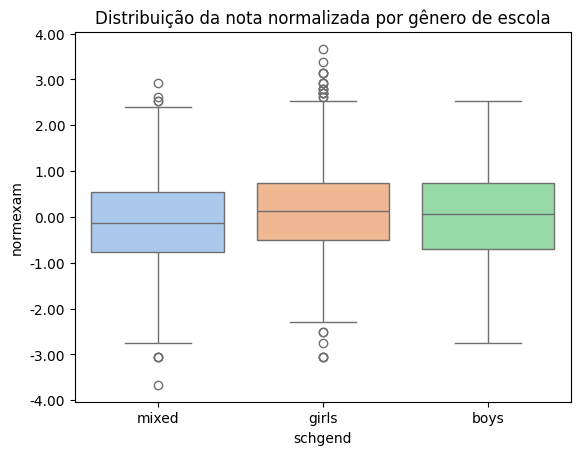

In [415]:
# Criação do box plot usando a biblioteca seaborn
sns.boxplot(x='schgend', y='normexam', hue='schgend', data=df_complete, palette='pastel', dodge=False, legend=False)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), frameon=False)

plt.title('Distribuição da nota normalizada por gênero de escola')
plt.xlabel('schgend')
plt.ylabel('normexam')

# Configurar o formato de exibição dos valores numéricos

plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))


plt.show()


Ao observar o diagrama, nota-se que as escolas exclusivamente femininas tendem a ter um desempenho melhor no exame é possível ver uma quantidade alta de outliers positivos nas notas, com notas mais altas em geral. Seguidas pelas escolas exclusivamente masculinas e, por fim, pelas escolas mistas. As escolas mistas apresentam a maior dispersão de notas, com muitos valores discrepantes tanto nas notas mais altas quanto nas mais baixas.

A diferença no tamanho das amostras (1262 alunas em escolas femininas e 475 alunos em escolas masculinas) pode explicar a falta de outliers positivos nas notas dos colégios masculinos.

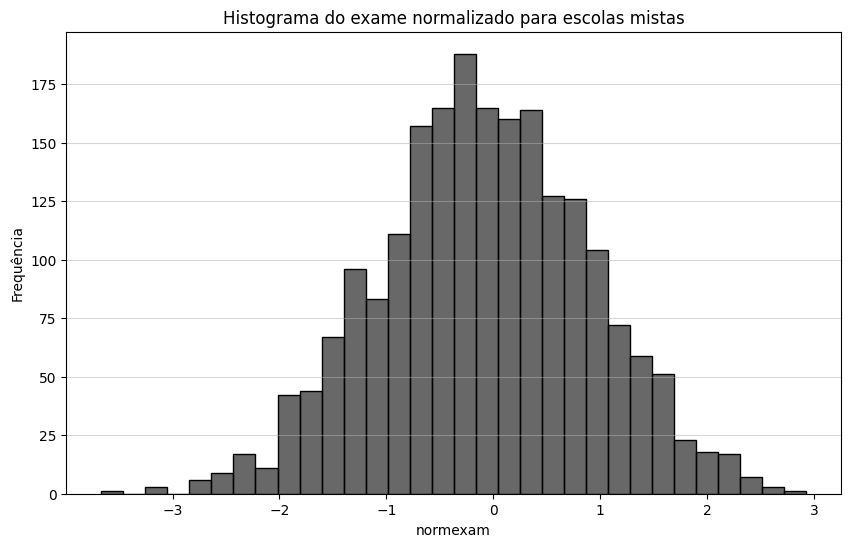

In [417]:
df_filtrado = df_complete[df_complete['type'] == 'Mxd']
plt.figure(figsize=(10, 6)) 
sns.histplot(data=df_filtrado, x='normexam', color='#363636', edgecolor='black')  
plt.title('Histograma do exame normalizado para escolas mistas') 
plt.xlabel('normexam')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.5) 
plt.show()

O histograma revela que a maioria dos alunos em escolas mistas tem um desempenho próximo da média no exame, com alguns alunos apresentando desempenho acima e abaixo da média.


A leve assimetria à direita indica que há uma proporção ligeiramente maior de alunos com notas acima da média do que abaixo. As notas extremas em ambos os lados da distribuição sugerem a presença de alunos com desempenhos muito altos e muito baixos.

Escolas separadas por sexo apresentam desempenho acadêmico mais homogêneo, com menor dispersão de notas em comparação com escolas mistas, indicando um ambiente de aprendizado mais focado e propício ao desenvolvimento individual.

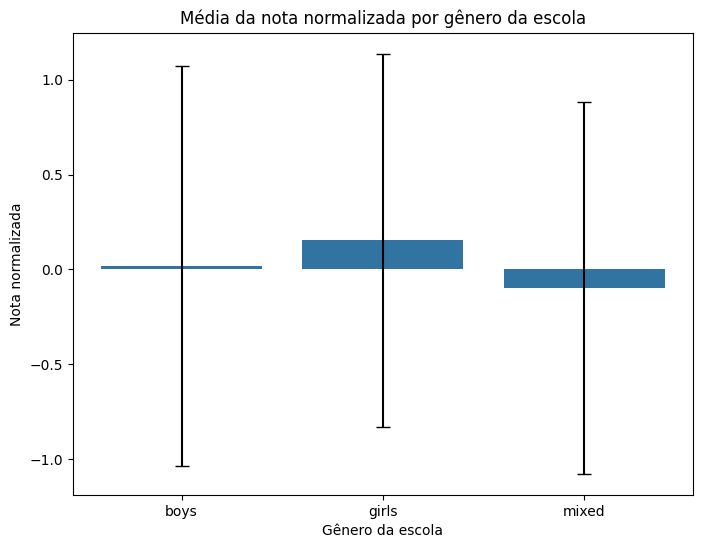

In [419]:
summary_stats = df_complete.groupby('schgend')['normexam'].agg(['mean', 'std'])
plt.figure(figsize=(8, 6))
sns.barplot(x=summary_stats.index, y=summary_stats['mean'])
plt.errorbar(x=summary_stats.index, y=summary_stats['mean'], yerr=summary_stats['std'], fmt='none', ecolor='black', capsize=5)

plt.title('Média da nota normalizada por gênero da escola')
plt.xlabel('Gênero da escola')
plt.ylabel('Nota normalizada')
plt.show()

As meninas tendem a ter um desempenho médio melhor do que os meninos e os alunos de escolas mistas.

As escolas só para meninas apresentam um desempenho mais homogêneo, com menor variação nas notas, em comparação com as escolas mistas e as escolas só para meninos.

As escolas mistas e as escolas só para meninos apresentam uma variação similar nas notas, embora as escolas mistas tenham uma média ligeiramente superior.

#### Portanto, infere-se que as escolas separadas por sexo são mais eficientes em termos de desempenho acadêmico, de acordo com as notas do exame normalizado. Sendo assim, promovendo um ambiente de aprendizado mais focado e com menor dispersão de notas.  Essa eficiência pode ser atribuída à criação de um ambiente de aprendizado mais focado, livre de distrações e estereótipos de gênero.